In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Env:
    def __init__(self):
        self.thetas = [0.1, 0.1, 0.2, 0.3]

    def react(self, arm):
        return 1 if np.random.rand() < self.thetas[arm] else 0
    
    def opt(self):
        return np.argmax(self.thetas)

In [8]:
N_ARMS = 4

class UCBAgent:
    def __init__(self, c):
        self.counts = [0 for _ in range(N_ARMS)]
        self.values = [0.0 for _ in range(N_ARMS)]
        self.c = c

    def cal_ucb(self, arm):
        return self.values[arm] + self.c * np.sqrt(np.log(sum(self.counts))/self.counts[arm])
    
    def get_arm(self):
        if 0 in self.counts:
            return self.counts.index(0)
        else:
            ucb = [self.cal_ucb(arm) for arm in range(len(self.counts))]
            arm = ucb.index(max(ucb))
        return arm
    
    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] = (self.values[arm] * (self.counts[arm] - 1) + reward) / self.counts[arm]

In [9]:
# T 번의 스텝을 N 번 시뮬레이션해서 결과 평가
def sim(Agent, env, N=1000, T=1000, c=0.1):
    seleted_arms = [[0 for _ in range(T)] for _ in range(N)]
    earned_rewards = [[0 for _ in range(T)] for _ in range(N)]
    for n in range(N):
        agent = Agent(c)
        for t in range(T):
            arm = agent.get_arm()
            reward = env.react(arm)
            agent.update(arm, reward)
            seleted_arms[n][t] = arm
            earned_rewards[n][t] = reward
    return np.array(seleted_arms), np.array(earned_rewards)

In [15]:
env = Env()
arms1, rewards1 = sim(UCBAgent, env, 1000, 1000, 0.05)
arms2, rewards2 = sim(UCBAgent, env, 1000, 1000, 0.1)
arms3, rewards3 = sim(UCBAgent, env, 1000, 1000, 0.5)
arms4, rewards4 = sim(UCBAgent, env, 1000, 1000, 1.0)

acc1 = np.mean(arms1 == env.opt(), axis=0)
acc2 = np.mean(arms2 == env.opt(), axis=0)
acc3 = np.mean(arms3 == env.opt(), axis=0)
acc4 = np.mean(arms4 == env.opt(), axis=0)

avg_rewards1 = np.mean(rewards1, axis=0)
avg_rewards2 = np.mean(rewards2, axis=0)
avg_rewards3 = np.mean(rewards3, axis=0)
avg_rewards4 = np.mean(rewards4, axis=0)

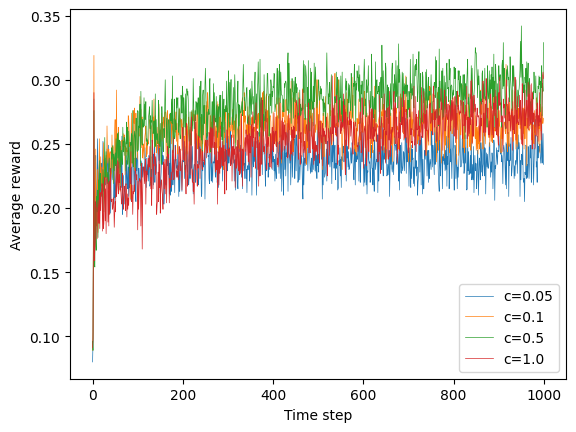

In [18]:
plt.plot(avg_rewards1, linewidth=0.5)
plt.plot(avg_rewards2, linewidth=0.5)
plt.plot(avg_rewards3, linewidth=0.5)
plt.plot(avg_rewards4, linewidth=0.5)

plt.xlabel('Time step')
plt.ylabel('Average reward')
plt.legend(['c=0.05', 'c=0.1', 'c=0.5', 'c=1.0']);

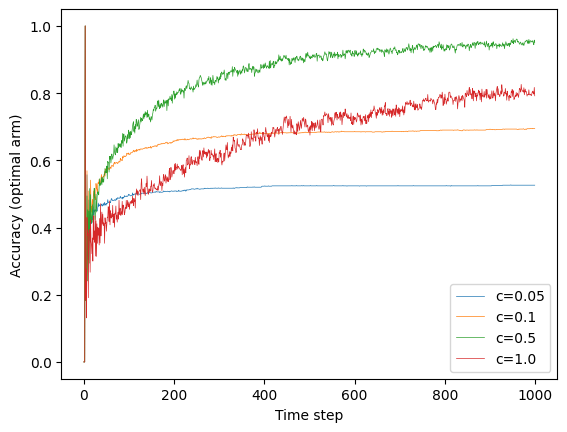

In [21]:
plt.plot(acc1, linewidth=0.5)
plt.plot(acc2, linewidth=0.5)
plt.plot(acc3, linewidth=0.5)
plt.plot(acc4, linewidth=0.5)

plt.xlabel('Time step')
plt.ylabel('Accuracy (optimal arm)')
plt.legend(['c=0.05', 'c=0.1', 'c=0.5', 'c=1.0']);